<a href="https://colab.research.google.com/github/haromero/Juegos-Inteligentes/blob/main/Sokoban.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
import pandas as pd
import numpy as np
import os
import gdown
import zipfile
import requests
import openpyxl
from pathlib import Path
import collections
import time
import resource
import copy
import time
import resource
from collections import deque
import heapq

# Importacion y Conversión los .xlsx a.txt

In [ ]:
# Diccionario con URLs de niveles en distintos tamaños
levels = {
    "7x7": "https://docs.google.com/spreadsheets/d/1GwDrodRwXSfY2-XyVpXWRapckNa6X6lNKUfFCgm2RlU/export?format=xlsx",
    "10x10": "https://docs.google.com/spreadsheets/d/1sTBogCO0hpYwqfeRrpIBgpg1BkCf5IU2Sxg1EipPwB8/export?format=xlsx",
    "15x15": "https://docs.google.com/spreadsheets/d/1NPZQykVsOYRVCvF7iP6FQZREX4bjxLyCBzQT0fSUqVg/export?format=xlsx"
}

# Descarga un archivo Excel desde una URL
def download_excel(url, filename):
    print(f"Descargando {filename}...")
    try:
        response = requests.get(url, timeout=30)  # Descarga con límite de tiempo
        response.raise_for_status()  # Lanza error si falla
        with open(filename, 'wb') as f:
            f.write(response.content)  # Guarda el archivo
        print(f"✓ {filename} descargado")
        return True
    except Exception as e:
        print(f"✗ Error: {e}")
        return False

# Extrae las hojas del Excel y las convierte en archivos .txt
def extract_sheets_to_txt(excel_file, output_folder):
    print(f"Extrayendo {excel_file}...")
    Path(output_folder).mkdir(parents=True, exist_ok=True)  # Crea carpeta destino

    try:
        workbook = openpyxl.load_workbook(excel_file, data_only=True)  # Carga Excel
        sheet_names = workbook.sheetnames  # Lista de hojas
        print(f"Hojas: {len(sheet_names)}")

        for sheet_name in sheet_names:
            sheet = workbook[sheet_name]
            safe_sheet_name = sheet_name.replace('/', '_').replace('\\', '_')  # Nombre seguro
            output_file = os.path.join(output_folder, f"{safe_sheet_name}.txt")

            with open(output_file, 'w', encoding='utf-8') as f:
                for row in sheet.iter_rows():
                    row_data = []
                    for cell in row:
                        value = cell.value
                        if value is None:
                            row_data.append(' ')  # Celda vacía
                        else:
                            row_data.append(str(value))
                    line = ''.join(row_data).rstrip()
                    if line:
                        f.write(line + '\n')  # Escribe línea

            print(f"  ✓ {sheet_name} → {safe_sheet_name}.txt")

        workbook.close()
        print(f"✓ Completado\n")
        return True
    except Exception as e:
        print(f"✗ Error: {e}\n")
        return False

# Procesa todos los niveles definidos en el diccionario
def process_all_levels():
    base_folder = "sokoban_levels"
    Path(base_folder).mkdir(exist_ok=True)  # Crea carpeta base

    print("=" * 60)
    print("EXTRACTOR DE NIVELES SOKOBAN")
    print("=" * 60)

    for level_size, url in levels.items():
        print(f"\n{'=' * 60}")
        print(f"Procesando {level_size}")
        print(f"{'=' * 60}")

        excel_filename = f"{level_size}.xlsx"

        if os.path.exists(excel_filename):
            print(f"{excel_filename} existe, reemplazando...")
            os.remove(excel_filename)  # Elimina archivo viejo

        if download_excel(url, excel_filename):  # Descarga Excel
            output_folder = os.path.join(base_folder, level_size)
            if extract_sheets_to_txt(excel_filename, output_folder):  # Convierte a TXT
                pass

        print()

    print("=" * 60)
    print("COMPLETADO")
    print("=" * 60)

# Lista los archivos TXT extraídos
def list_extracted_files():
    base_folder = "sokoban_levels"
    if not os.path.exists(base_folder):
        print("No se encontró la carpeta")
        return

    print("\n" + "=" * 60)
    print("ARCHIVOS EXTRAÍDOS")
    print("=" * 60)

    total_files = 0
    for level_size in levels.keys():
        folder = os.path.join(base_folder, level_size)
        if os.path.exists(folder):
            txt_files = [f for f in os.listdir(folder) if f.endswith('.txt')]
            print(f"\n{level_size}: {len(txt_files)} archivos")
            for txt_file in sorted(txt_files)[:5]:  # Muestra primeros 5
                print(f"  - {txt_file}")
            if len(txt_files) > 5:
                print(f"  ... y {len(txt_files) - 5} más")
            total_files += len(txt_files)

    print(f"\nTotal: {total_files}")

# Carga un nivel desde un archivo TXT y devuelve su matriz
def load_level_from_txt(txt_file):
    try:
        with open(txt_file, 'r', encoding='utf-8') as f:
            lines = f.readlines()  # Lee líneas del archivo

        board = []
        for line in lines:
            row = list(line.rstrip('\n'))  # Convierte cada línea en lista
            if row:
                board.append(row)
        return board
    except Exception as e:
        print(f"Error: {e}")
        return None

# Punto de entrada principal
if __name__ == "__main__":
    process_all_levels()  # Ejecuta todo el proceso
    list_extracted_files()  # Muestra resumen
    print("\n✓ Proceso finalizado")

EXTRACTOR DE NIVELES SOKOBAN

Procesando 7x7
Descargando 7x7.xlsx...
✓ 7x7.xlsx descargado
Extrayendo 7x7.xlsx...
Hojas: 4
  ✓ Nivel 1 → Nivel 1.txt
  ✓ Nivel 2 → Nivel 2.txt
  ✓ Nivel 3 → Nivel 3.txt
  ✓ Nivel 4 → Nivel 4.txt
✓ Completado



Procesando 10x10
Descargando 10x10.xlsx...
✓ 10x10.xlsx descargado
Extrayendo 10x10.xlsx...
Hojas: 4
  ✓ Nivel 1 → Nivel 1.txt
  ✓ Nivel 2 → Nivel 2.txt
  ✓ Nivel 3 → Nivel 3.txt
  ✓ Nivel 4 → Nivel 4.txt
✓ Completado



Procesando 15x15
Descargando 15x15.xlsx...
✓ 15x15.xlsx descargado
Extrayendo 15x15.xlsx...
Hojas: 3
  ✓ Nivel 1 → Nivel 1.txt
  ✓ Nivel 2 → Nivel 2.txt
  ✓ Nivel 3 → Nivel 3.txt
✓ Completado


COMPLETADO

ARCHIVOS EXTRAÍDOS

7x7: 4 archivos
  - Nivel 1.txt
  - Nivel 2.txt
  - Nivel 3.txt
  - Nivel 4.txt

10x10: 4 archivos
  - Nivel 1.txt
  - Nivel 2.txt
  - Nivel 3.txt
  - Nivel 4.txt

15x15: 3 archivos
  - Nivel 1.txt
  - Nivel 2.txt
  - Nivel 3.txt

Total: 11

✓ Proceso finalizado


# Reglas del juego Sokoban

1. **Jugador (Sokoban)**

   Puede moverse en 4 direcciones: arriba, abajo, izquierda y derecha.
   Solo se mueve una casilla por vez.

2. **Cajas**

   El jugador puede empujar una caja si:
   Está justo al lado de ella.
   La casilla siguiente en la misma dirección está vacía.
   No se pueden jalar cajas (solo empujar).
   No se pueden empujar varias cajas a la vez.

3. **Paredes**

   El jugador no puede atravesarlas.
   Las cajas no pueden moverse contra ellas.

4. **Metas**

   Cada meta es una casilla marcada como objetivo.
   El número de metas coincide con el número de cajas.
   Una caja colocada en una meta se considera en su posición final.

5. **Condición de Victoria**

   El nivel se resuelve cuando todas las cajas están en las metas.

6. **Restricciones Importantes**

   Una caja en una esquina sin meta queda atascada (nivel imposible de resolver).
   Cada movimiento debe ser planeado cuidadosamente, porque un error puede dejar el nivel sin solución.

 # ***pseudocodigos***

Código en matrix

DFS

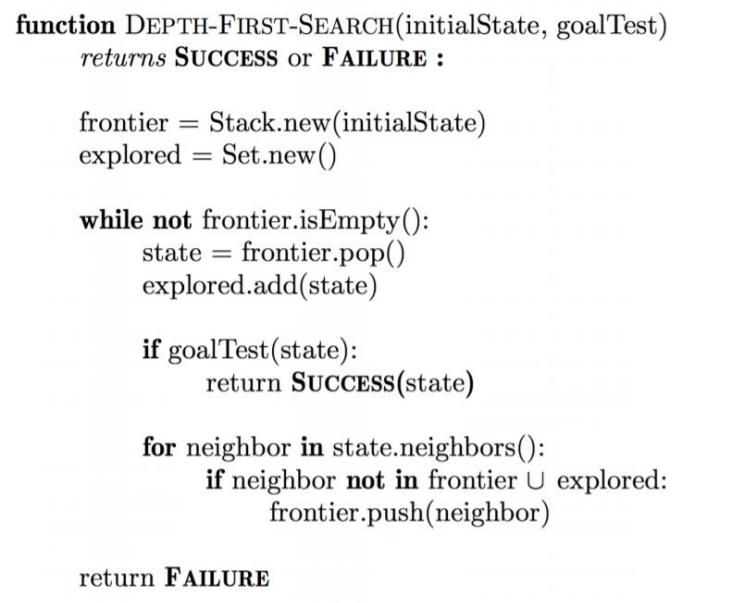



```
# /**
Algorithm: DFS (Matrix)
*/

#include <bits/stdc++.h>
#define oo 1005

using namespace std;

struct two
{
    int f, c;

    two(int a = 0, int b = 0)
    {
        f = a;
        c = b;
    }
};

const int Mf [] = {1, -1, 0, 0};
const int Mc [] = {0, 0, 1, -1};

int N, M, CA[oo][oo];
bool Mk[oo][oo];
queue<two> Q;

bool isPossible (int f, int c)  ///Saber si es posible el movimiento hacia esa casilla
{
    if(f < 0 || f > N - 1 || c < 0 || c > M - 1 || Mk[f][c])
        return false;
    return true;
}

void DFS ()
{
    int F, C;

    while(!Q.empty())
    {
        F = Q.front().f;
        C = Q.front().c;

        Q.pop();

        for(int i = 0; i < 4; i++)
        {
            int nf = F + Mf[i];
            int nc = C + Mc[i];

            if(isPossible(nf, nc))
            {
                CA[nf][nc] = CA[F][C] + 1;
                Mk[nf][nc] = true;
                Q.push(two (nf, nc));
            }
        }
    }
}

int main ()
{
    freopen("DFS.in", "r", stdin);
    freopen("DFS.out", "w", stdout);

    int X = 0;
    two _s, _e; ///Punto de Inicio

    cin >> N >> M;


    for(int i = 0; i < N; i++)
    {
        for(int j = 0; j < M; j++)
        {
            scanf("%s", &X); ///Leer como caracter pero asignar a numero
            if(X == 83) ///Inicio Letra - S
            {
                _s.f = i;
                _s.c = j;
                continue;
            }
            if(X == 69) ///Final Letra - E
            {
                _e.f = i;
                _e.c = j;
                continue;
            }
            if(X == 1)  ///Rocas
            {
                Mk[i][j] = true;
                continue;
            }
        }
    }
    Q.push(two (_s.f, _s.c));
    CA[0][0] = 0;
    Mk[0][0] = true;
    DFS();
    printf("%d\n", CA[_e.f][_e.c]);

    return 0;
}
```



Pseudocódigo para grafos




```
#  DFS(grafo G)
     PARA CADA vértice u ∈ V[G] HACER
             estado[u] ← NO_VISITADO
             padre[u] ← NULO
     tiempo ← 0
     PARA CADA vértice u ∈ V[G] HACER
             SI estado[u] = NO_VISITADO ENTONCES
                     DFS_Visitar(u,tiempo)
                     
  DFS_Visitar(nodo u, int tiempo)
     estado[u] ← VISITADO
     tiempo ← tiempo + 1
     d[u] ← tiempo
     PARA CADA v ∈ Vecinos[u] HACER
             SI estado[v] = NO_VISITADO ENTONCES
                     padre[v] ← u
                     DFS_Visitar(v,tiempo)
     estado[u] ← TERMINADO
     tiempo ← tiempo + 1
     f[u] ← tiempo
```

BFS



> Aggiungi citazione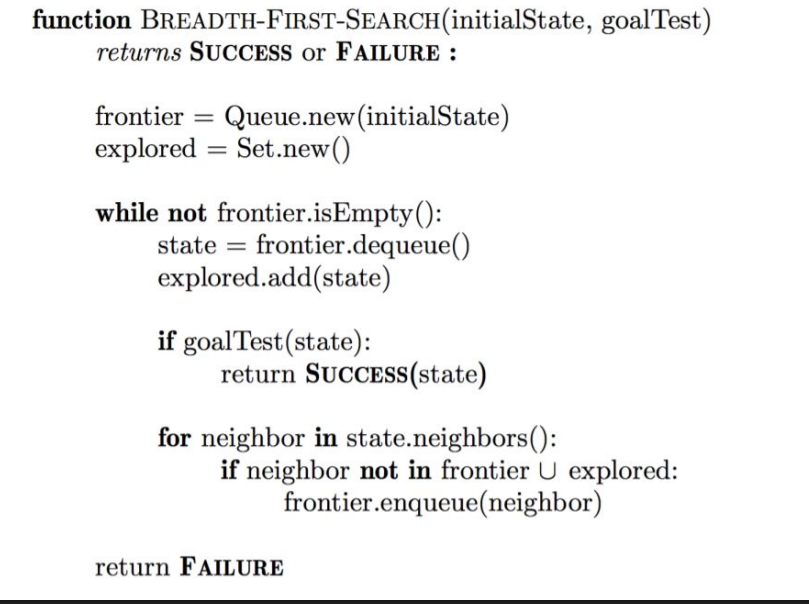



# Funcion para eliminar los NaN

In [ ]:
def eliminar_nan(df):
  df = df.dropna(how='all')
  df = df.dropna(axis=1, how='all')
  df = df.fillna('-')
  return df

# Cargar el nivel desde el .txt


In [ ]:
# Ruta donde están los niveles
path = "/content/sokoban_levels/7x7"

# Lista ordenada de archivos .txt en la carpeta
niveles = sorted([f for f in os.listdir(path) if f.endswith('.txt')])

# Muestra las opciones disponibles
seleccion = print(f"Opciones: \n")
for i in range(len(niveles)):
    print(f"{i+1}. {niveles[i]}")

# Pide al usuario que elija un nivel
entrada = input("\nEleccion:")
seleccion = int(entrada) - 1  # Ajusta índice

# Crea la ruta completa del archivo elegido
ruta_nivel = os.path.join(path, niveles[seleccion])

# Lee el contenido del nivel
with open(ruta_nivel, 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Convierte las líneas en una matriz (lista de listas)
matrix = [list(line.rstrip('\n')) for line in lines if line.strip()]

# Muestra el nivel en pantalla
for row in matrix:
    print(''.join(row))

Opciones: 

1. Nivel 1.txt
2. Nivel 2.txt
3. Nivel 3.txt
4. Nivel 4.txt

Eleccion:1
XXXXXXX
X--M--X
X-CX--X
X--P--X
X--XCMX
X-CM--X
XXXXXXX


In [ ]:
board = matrix
board

[['X', 'X', 'X', 'X', 'X', 'X', 'X'],
 ['X', '-', '-', 'M', '-', '-', 'X'],
 ['X', '-', 'C', 'X', '-', '-', 'X'],
 ['X', '-', '-', 'P', '-', '-', 'X'],
 ['X', '-', '-', 'X', 'C', 'M', 'X'],
 ['X', '-', 'C', 'M', '-', '-', 'X'],
 ['X', 'X', 'X', 'X', 'X', 'X', 'X']]

# === Sokoban ===

b. Se indicará con la letra “P” (mayúscula), el jugador.

c. Se indicará con la letra “X” (mayúscula), un obstáculo inamovible.

d. Se indicará con la letra “C” (mayúscula), una caja.

e. Se indicará con la letra “M” (mayúscula), una meta.

# Clase base del juego Sokoban

In [ ]:
class SokobanGame:
    def __init__(self, board):
        # Inicializa el tablero y obtiene dimensiones
        self.board = board
        self.rows = len(board)
        self.cols = len(board[0]) if self.rows > 0 else 0
        self.player_pos = self.find_player()  # Posición del jugador
        self.goals = self.find_goals()        # Posiciones de metas

    def find_player(self):
        # Busca la posición del jugador (P)
        for r in range(self.rows):
            for c in range(self.cols):
                if self.board[r][c] == 'P':
                    return (r, c)
        return None  # Si no hay jugador

    def find_goals(self):
        # Busca y guarda todas las metas (M o CM)
        goals = []
        for r in range(self.rows):
            for c in range(self.cols):
                if self.board[r][c] in ['M', 'CM']:
                    goals.append((r, c))
        return goals

    def display_board(self):
        # Limpia pantalla y muestra el tablero
        os.system("cls" if os.name == "nt" else "clear")
        for r in range(self.rows):
            row_str = ""
            for c in range(self.cols):
                cell = str(self.board[r][c])
                # Pinta en verde las cajas en meta
                if cell == 'CM':
                    row_str += "\033[92mCM\033[0m "
                else:
                    row_str += cell + " "
            print(row_str)
        print()

    def move_player(self, direction):
        # Mueve al jugador según dirección dada
        row, col = self.player_pos
        new_row, new_col = row, col

        # Cambia coordenadas según tecla
        if direction.lower() == 'w':  # Arriba
            new_row = row - 1
        elif direction.lower() == 's':  # Abajo
            new_row = row + 1
        elif direction.lower() == 'a':  # Izquierda
            new_col = col - 1
        elif direction.lower() == 'd':  # Derecha
            new_col = col + 1
        else:
            return False  # Movimiento inválido

        # Verifica si el movimiento es válido
        if self.is_valid_move(new_row, new_col, row, col):
            self.update_board(new_row, new_col, row, col)
            self.player_pos = (new_row, new_col)  # Actualiza posición
            return True
        return False

    def is_valid_move(self, new_row, new_col, old_row, old_col):
        # Rechaza movimiento fuera del tablero
        if not (0 <= new_row < self.rows and 0 <= new_col < self.cols):
            return False

        target_cell = str(self.board[new_row][new_col]).strip()

        # Bloquea si es pared
        if target_cell == 'X':
            return False

        # Si hay caja, verifica empuje
        if target_cell in ['C', 'CM']:
            push_row = new_row + (new_row - old_row)
            push_col = new_col + (new_col - old_col)

            # Impide empujar fuera del tablero
            if not (0 <= push_row < self.rows and 0 <= push_col < self.cols):
                return False

            push_cell = str(self.board[push_row][push_col]).strip()

            # Evita empujar contra otra caja o pared
            if push_cell in ['X', 'C', 'CM']:
                return False

        return True  # Movimiento permitido

    def update_board(self, new_row, new_col, old_row, old_col):
        # Actualiza tablero tras mover jugador o caja
        current_cell = self.board[new_row][new_col]

        # Si hay caja, la empuja
        if current_cell in ['C', 'CM']:
            push_row = new_row + (new_row - old_row)
            push_col = new_col + (new_col - old_col)

            # Caja en meta
            if (push_row, push_col) in self.goals:
                self.board[push_row][push_col] = 'CM'
            # Caja que sale de meta
            elif current_cell == 'CM':
                self.board[new_row][new_col] = 'M'
                self.board[push_row][push_col] = 'C'
            else:
                self.board[push_row][push_col] = 'C'

        # Limpia posición anterior del jugador
        if (old_row, old_col) in self.goals:
            self.board[old_row][old_col] = 'M'
        else:
            self.board[old_row][old_col] = '-'

        # Coloca jugador en nueva posición
        self.board[new_row][new_col] = 'P'

    def check_win(self):
        # Cuenta metas totales
        c_metas = len(self.find_goals())
        print('cantidad de metas:', c_metas)
        print('find goals:', self.find_goals())

        # Cuenta cajas en metas
        metas_encontradas = 0
        for r in range(self.rows):
            for c in range(self.cols):
                if self.board[r][c] == 'CM':
                    metas_encontradas += 1

        print('metas encontradas:', metas_encontradas)

        # Gana si todas las metas están cubiertas
        if metas_encontradas == c_metas:
            return True
        else:
            return False

# Instancia

In [ ]:
game = SokobanGame(board)

# Sección nueva

# Loop jugable

In [ ]:
while True:
    game.display_board()
    move = input("Movimiento (W/A/S/D) o 'q' para salir: ").strip()

    if move.lower() == 'q':
        print("El juego cerró exitosamente...")
        break

    if not game.move_player(move):
        print("Movimiento invalido. Intenta de nuevo.")

    if game.check_win():
        game.display_board()
        print("Felicidades! Completaste el nivel!")
        break

X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - P - - X 
X - - X C M X 
X - C M - - X 
X X X X X X X 

Movimiento (W/A/S/D) o 'q' para salir: 1
Movimiento invalido. Intenta de nuevo.
cantidad de metas: 3
find goals: [(1, 3), (4, 5), (5, 3)]
metas encontradas: 0
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - P - - X 
X - - X C M X 
X - C M - - X 
X X X X X X X 

Movimiento (W/A/S/D) o 'q' para salir: q
El juego cerró exitosamente...


# BFS

In [ ]:
# Direcciones válidas: arriba, abajo, izquierda, derecha (con tecla asociada)
DIRECTIONS = [('U', -1, 0, 'w'), ('D', 1, 0, 's'), ('L', 0, -1, 'a'), ('R', 0, 1, 'd')]

def bfs_sokoban_stats(initial_game, debug=False):
    # Mide tiempo de inicio y prepara estructuras BFS
    start_time = time.time()
    queue = deque()
    visited = set()

    # Obtiene posiciones de cajas en el tablero
    def box_positions(board):
        boxes = []
        for i, row in enumerate(board):
            for j, c in enumerate(row):
                if c in ('C', 'CM'):  # Caja normal o en meta
                    boxes.append((i, j))
        return tuple(sorted(boxes))

    # Obtiene posiciones de metas en el tablero
    def goals_positions(board):
        goals = []
        for i, row in enumerate(board):
            for j, c in enumerate(row):
                if c in ('M', 'CM'):  # Meta libre o con caja
                    goals.append((i, j))
        return tuple(sorted(goals))

    # Serializa el estado actual (para evitar repeticiones)
    def serialize(board, player_pos):
        return (box_positions(board), tuple(player_pos))

    # Estado inicial del BFS
    b0 = [list(r) for r in initial_game.board]
    p0 = tuple(initial_game.player_pos)
    q_state = (tuple(tuple(r) for r in b0), p0)
    queue.append((q_state, []))
    visited.add(serialize(b0, p0))
    goals = set(goals_positions(b0))

    # Contadores de estadísticas
    nodes_expanded = 0
    max_search_depth = 0

    # Bucle principal BFS
    while queue:
        (board_t, player_pos), actions = queue.popleft()
        nodes_expanded += 1
        depth = len(actions)
        max_search_depth = max(max_search_depth, depth)

        # Reconstruye el tablero actual
        board = [list(r) for r in board_t]
        game = SokobanGame([list(r) for r in board])
        game.player_pos = tuple(player_pos)
        if hasattr(game, 'find_goals'):
            game.goals = game.find_goals()

        # Verifica si las cajas están en las metas
        boxes = set(box_positions(game.board))
        if boxes == goals:
            if debug:
                # Muestra detalles de depuración
                print("GOAL DETECTED")
                print("boxes:", boxes)
                print("goals:", goals)
                for r in game.board:
                    print(''.join(r))

            # Calcula estadísticas finales
            running_time = time.time() - start_time
            max_ram_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024.0

            # Guarda resultados en un archivo
            with open('output.txt', 'w') as f:
                f.write(f"path_to_goal: {''.join(actions)}\n")
                f.write(f"cost_of_path: {len(actions)}\n")
                f.write(f"nodes_expanded: {nodes_expanded}\n")
                f.write(f"search_depth: {depth}\n")
                f.write(f"max_search_depth: {max_search_depth}\n")
                f.write(f"running_time: {running_time:.8f}\n")
                f.write(f"max_ram_usage: {max_ram_usage:.8f}\n")

            print("¡Solución encontrada! Ver output.txt")
            return actions  # Devuelve el camino al objetivo

        # Expande los posibles movimientos
        for direction, dx, dy, move_key in DIRECTIONS:
            new_game = SokobanGame([list(r) for r in board])
            new_game.player_pos = tuple(player_pos)
            if hasattr(new_game, 'find_goals'):
                new_game.goals = new_game.find_goals()

            moved = new_game.move_player(move_key)
            if not moved:
                continue  # Si no se puede mover, salta

            ser = serialize(new_game.board, new_game.player_pos)
            if ser not in visited:
                visited.add(ser)
                new_state = (tuple(tuple(r) for r in new_game.board), tuple(new_game.player_pos))
                queue.append((new_state, actions + [direction]))

    # Si termina sin solución
    print("No se encontró solución.")
    return None

In [ ]:
# Inicializa el juego
game = SokobanGame(board) # board viene de tu celda previa

# Ejecuta BFS y muestra resultado
acciones = bfs_sokoban_stats(game, debug=True)

# Simulate the game using the actions from BFS
game_simulation = SokobanGame([list(r) for r in board]) # Use a copy of the original board
game_simulation.player_pos = game_simulation.find_player()
game_simulation.goals = game_simulation.find_goals()

print("Initial Board:")
game_simulation.display_board()

if acciones:
    print("\nSimulating BFS actions:")
    for action in acciones:
        print(f"\nPerforming action: {action}")
        if action == 'U':
            game_simulation.move_player('w')
        elif action == 'D':
            game_simulation.move_player('s')
        elif action == 'L':
            game_simulation.move_player('a')
        elif action == 'R':
            game_simulation.move_player('d')

        game_simulation.display_board()

    if game_simulation.check_win():
        print("Nivel completado.")
    else:
        print("No se pudo completar el nivel.")

    # Read and display the content of output.txt
    try:
        with open('output_bfs.txt', 'r') as f:
            print("\n--- BFS Output ---")
            print(f.read())
    except FileNotFoundError:
        print("\nNo se pudo generar el archivo txt")

else:
    print("El Algoritmo BFS no hizo nada.")

GOAL DETECTED
boxes: {(5, 3), (4, 5), (1, 3)}
goals: {(5, 3), (4, 5), (1, 3)}
XXXXXXX
X--CMP-X
X--X--X
X-----X
X--X-CX
X--CM--X
XXXXXXX
¡Solución encontrada! Ver output.txt
Initial Board:
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - P - - X 
X - - X C M X 
X - C M - - X 
X X X X X X X 


Simulating BFS actions:

Performing action: R
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - P - X 
X - - X C M X 
X - C M - - X 
X X X X X X X 


Performing action: R
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - P X 
X - - X C M X 
X - C M - - X 
X X X X X X X 


Performing action: D
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - - X 
X - - X C P X 
X - C M - - X 
X X X X X X X 


Performing action: D
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - - X 
X - - X C M X 
X - C M - P X 
X X X X X X X 


Performing action: L
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - - X 
X - - X C M X 
X - C M P - X 
X X X X X X X 


Performing action: U
X X X X X X X 
X - 

# algoritmo DFS

In [ ]:
# Direcciones compatibles con tu lógica de tablero
DIRECTIONS = [('U', -1, 0, 'w'), ('D', 1, 0, 's'), ('L', 0, -1, 'a'), ('R', 0, 1, 'd')]

def dfs_sokoban_stats(initial_game, debug=False):
    start_time = time.time()
    stack = []
    visited = set()

    # Serializa las posiciones de cajas según tu tablero
    def box_positions(board):
        boxes = []
        for i, row in enumerate(board):
            for j, c in enumerate(row):
                if c in ('C', 'CM'):  # Caja normal o en meta
                    boxes.append((i, j))
        return tuple(sorted(boxes))

    # Serializa las posiciones de metas según tu tablero
    def goals_positions(board):
        goals = []
        for i, row in enumerate(board):
            for j, c in enumerate(row):
                if c in ('M', 'CM'):  # Meta vacía o caja en meta
                    goals.append((i, j))
        return tuple(sorted(goals))

    def serialize(board, player_pos):
        return (box_positions(board), tuple(player_pos))

    # Inicializa DFS
    b0 = [list(r) for r in initial_game.board]
    p0 = tuple(initial_game.player_pos)
    q_state = (tuple(tuple(r) for r in b0), p0)
    stack.append((q_state, []))
    visited.add(serialize(b0, p0))
    goals = set(goals_positions(b0))

    nodes_expanded = 0
    max_search_depth = 0

    while stack:
        (board_t, player_pos), actions = stack.pop()
        nodes_expanded += 1
        depth = len(actions)
        max_search_depth = max(max_search_depth, depth)

        # Reconstruir board y estado
        board = [list(r) for r in board_t]
        game = SokobanGame([list(r) for r in board])
        game.player_pos = tuple(player_pos)
        if hasattr(game, 'find_goals'):
            game.goals = game.find_goals()

        # Comprobar victoria comparando posiciones de cajas y metas
        boxes = set(box_positions(game.board))
        if boxes == goals:
            if debug:
                print("GOAL DETECTED")
                print("boxes:", boxes)
                print("goals:", goals)
                for r in game.board:
                    print(''.join(r))
            running_time = time.time() - start_time
            max_ram_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024.0
            with open('output_dfs.txt', 'w') as f:
                f.write(f"path_to_goal: {''.join(actions)}\n")
                f.write(f"cost_of_path: {len(actions)}\n")
                f.write(f"nodes_expanded: {nodes_expanded}\n")
                f.write(f"search_depth: {depth}\n")
                f.write(f"max_search_depth: {max_search_depth}\n")
                f.write(f"running_time: {running_time:.8f}\n")
                f.write(f"max_ram_usage: {max_ram_usage:.8f}\n")
            print("¡Solución encontrada! Ver output_dfs.txt")
            return actions

        # Expandir movimientos
        for direction, dx, dy, move_key in DIRECTIONS:
            new_game = SokobanGame([list(r) for r in board])
            new_game.player_pos = tuple(player_pos)
            if hasattr(new_game, 'find_goals'):
                new_game.goals = new_game.find_goals()

            moved = new_game.move_player(move_key)
            if not moved:
                continue

            ser = serialize(new_game.board, new_game.player_pos)
            if ser not in visited:
                visited.add(ser)
                new_state = (tuple(tuple(r) for r in new_game.board), tuple(new_game.player_pos))
                stack.append((new_state, actions + [direction]))

    print("No se encontró solución.")
    return None

In [ ]:
# Inicializa el juego
game = SokobanGame(board)  # board viene de tu celda previa

# Ejecuta DFS y muestra resultado
acciones = dfs_sokoban_stats(game, debug=True)

# Simula el juego usando las acciones de DFS
game_simulation = SokobanGame([list(r) for r in board])  # Usa una copia del tablero original
game_simulation.player_pos = game_simulation.find_player()
game_simulation.goals = game_simulation.find_goals()

print("Initial Board:")
game_simulation.display_board()

if acciones:
    print("\nSimulating DFS actions:")
    for action in acciones:
        print(f"\nPerforming action: {action}")
        if action == 'U':
            game_simulation.move_player('w')
        elif action == 'D':
            game_simulation.move_player('s')
        elif action == 'L':
            game_simulation.move_player('a')
        elif action == 'R':
            game_simulation.move_player('d')

        game_simulation.display_board()

    if game_simulation.check_win():
        print("Nivel completado.")
    else:
        print("No se pudo completar el nivel.")

    # Lee y muestra el contenido de output_dfs.txt
    try:
        with open('output_dfs.txt', 'r') as f:
            print("\n--- DFS Output ---")
            print(f.read())
    except FileNotFoundError:
        print("\nNo se pudo generar el archivo txt")
else:
    print("El Algoritmo DFS no hizo nada.")

GOAL DETECTED
boxes: {(5, 3), (4, 5), (1, 3)}
goals: {(5, 3), (4, 5), (1, 3)}
XXXXXXX
X--C--X
X--X--X
X----PX
X--X-CX
X--C--X
XXXXXXX
¡Solución encontrada! Ver output_dfs.txt
Initial Board:
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - P - - X 
X - - X C M X 
X - C M - - X 
X X X X X X X 


Simulating DFS actions:

Performing action: R
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - P - X 
X - - X C M X 
X - C M - - X 
X X X X X X X 


Performing action: R
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - P X 
X - - X C M X 
X - C M - - X 
X X X X X X X 


Performing action: D
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - - X 
X - - X C P X 
X - C M - - X 
X X X X X X X 


Performing action: D
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - - X 
X - - X C M X 
X - C M - P X 
X X X X X X X 


Performing action: L
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - - X 
X - - X C M X 
X - C M P - X 
X X X X X X X 


Performing action: U
X X X X X X X 
X 

# AST

In [ ]:
# Direcciones compatibles con la lógica del tablero (arriba, abajo, izquierda, derecha)
DIRECTIONS = [('U', -1, 0, 'w'), ('D', 1, 0, 's'), ('L', 0, -1, 'a'), ('R', 0, 1, 'd')]

def ast_sokoban_stats(initial_game, debug=False):
    start_time = time.time()  # Guarda el tiempo de inicio del algoritmo
    pq = []  # Cola de prioridad (heap) donde se almacenarán los nodos con su costo f(n)
    g_values = {}  # Diccionario para guardar los costos g(n) de cada estado visitado

    # Retorna las posiciones de todas las cajas ('C' o 'CM') del tablero
    def box_positions(board):
        boxes = []
        for i, row in enumerate(board):
            for j, c in enumerate(row):
                if c in ('C', 'CM'):  # Caja normal o caja sobre meta
                    boxes.append((i, j))
        return tuple(sorted(boxes))  # Se devuelve una tupla ordenada para que sea hasheable

    # Retorna las posiciones de todas las metas ('M' o 'CM')
    def goals_positions(board):
        goals = []
        for i, row in enumerate(board):
            for j, c in enumerate(row):
                if c in ('M', 'CM'):  # Meta vacía o caja en meta
                    goals.append((i, j))
        return tuple(sorted(goals))

    # Serializa el estado del juego en una tupla (para evitar duplicados en visitados)
    def serialize(board, player_pos):
        return (box_positions(board), tuple(player_pos))

    # Distancia Manhattan entre dos puntos (sin diagonales)
    def manhattan(p1, p2):
        return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

    # ---- Heurística ----
    def heuristic(board, player_pos, goals_list, num_boxes, max_dist):
        """
        Calcula una función heurística h(n) combinando tres componentes:
        h1: Suma de distancias mínimas caja-meta (subestimación admisible)
        h2: Distancia del jugador a la caja más cercana no colocada
        h3: Número de cajas que no están en metas
        """

        boxes = list(box_positions(board))
        if not boxes:
            return 0.0  # Si no hay cajas, la heurística es 0

        # h1: Suma de distancias mínimas caja-meta
        h1 = sum(min(manhattan(b, g) for g in goals_list) for b in boxes)
        h1_norm = h1 / (max_dist * num_boxes)  # Normalización

        # h2: Distancia del jugador a la caja no en meta más cercana
        boxes_not_on_goal = [b for b in boxes if b not in goals_list]
        if not boxes_not_on_goal:
            h2 = 0
        else:
            h2 = min(manhattan(player_pos, b) for b in boxes_not_on_goal)
        h2_norm = h2 / max_dist  # Normalización

        # h3: Número de cajas fuera de metas
        h3 = len(boxes_not_on_goal)
        h3_norm = h3 / num_boxes

        # Pesos para cada componente heurística (ajustables según rendimiento)
        w1, w2, w3 = 1.0, 0.5, 0.5
        h = w1 * h1_norm + w2 * h2_norm + w3 * h3_norm
        return h

    # Inicialización del algoritmo A*
    b0 = [list(r) for r in initial_game.board]  # Copia del tablero inicial
    p0 = tuple(initial_game.player_pos)         # Posición inicial del jugador
    ser0 = serialize(b0, p0)                    # Estado inicial serializado
    goals_list = list(goals_positions(b0))      # Lista de metas
    goals_set = set(goals_list)                 # Conjunto de metas
    num_boxes = len(goals_list)                 # Número de cajas = número de metas
    max_dist = len(b0) + len(b0[0])             # Distancia máxima posible (aproximación)

    initial_h = heuristic(b0, p0, goals_list, num_boxes, max_dist)  # h(n) inicial
    initial_state = (tuple(tuple(r) for r in b0), p0)
    heapq.heappush(pq, (initial_h, 0, initial_state, []))  # Inserta estado inicial (f, g, state, path)
    g_values[ser0] = 0  # Costo g(n) inicial

    # Contadores para estadísticas
    nodes_expanded = 0
    max_search_depth = 0

    # Bucle principal del algoritmo A*
    while pq:
        # Extrae el estado con menor costo total f(n)
        f, g, (board_t, player_pos), actions = heapq.heappop(pq)
        ser = serialize(board_t, player_pos)
        if g > g_values.get(ser, float('inf')):
            continue  # Si encontramos un camino más largo, lo ignoramos

        nodes_expanded += 1
        depth = len(actions)
        max_search_depth = max(max_search_depth, depth)

        # Reconstruir el estado del juego
        board = [list(r) for r in board_t]
        game = SokobanGame([list(r) for r in board])
        game.player_pos = list(player_pos)
        if hasattr(game, 'find_goals'):
            game.goals = game.find_goals()

        # Comprobamos si todas las cajas están en metas (condición de victoria)
        boxes = set(box_positions(game.board))
        if boxes == goals_set:
            # Si se activa debug, imprime detalles
            if debug:
                print("GOAL DETECTED")
                print("boxes:", boxes)
                print("goals:", goals_set)
                for r in game.board:
                    print(''.join(r))

            # Calcula estadísticas finales y guarda resultados en un archivo
            running_time = time.time() - start_time
            max_ram_usage = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024.0
            with open('output_ast.txt', 'w') as f:
                f.write(f"path_to_goal: {''.join(actions)}\n")
                f.write(f"cost_of_path: {len(actions)}\n")
                f.write(f"nodes_expanded: {nodes_expanded}\n")
                f.write(f"search_depth: {depth}\n")
                f.write(f"max_search_depth: {max_search_depth}\n")
                f.write(f"running_time: {running_time:.8f}\n")
                f.write(f"max_ram_usage: {max_ram_usage:.8f}\n")

            print("¡Solución encontrada! Ver output_ast.txt")
            return actions  # Devuelve el camino solución

        # Expansión de movimientos posibles
        for direction, dx, dy, move_key in DIRECTIONS:
            new_game = SokobanGame([list(r) for r in board])
            new_game.player_pos = list(player_pos)
            if hasattr(new_game, 'find_goals'):
                new_game.goals = new_game.find_goals()

            moved = new_game.move_player(move_key)
            if not moved:
                continue  # Si no se pudo mover, pasa al siguiente

            new_ser = serialize(new_game.board, new_game.player_pos)
            new_g = g + 1  # Costo del nuevo estado

            # Si encontramos un mejor camino a este estado, lo actualizamos
            if new_g < g_values.get(new_ser, float('inf')):
                g_values[new_ser] = new_g
                new_h = heuristic(new_game.board, new_game.player_pos, goals_list, num_boxes, max_dist)
                new_f = new_g + new_h
                new_state = (tuple(tuple(r) for r in new_game.board), tuple(new_game.player_pos))
                heapq.heappush(pq, (new_f, new_g, new_state, actions + [direction]))

    # Si la cola se vacía sin encontrar solución
    print("No se encontró solución.")
    return None

In [ ]:
# Inicializa el juego
game = SokobanGame(board) # board viene de tu celda previa

# Ejecuta A* y muestra resultado
acciones = ast_sokoban_stats(game, debug=True)

# Simulate the game using the actions from A*
game_simulation = SokobanGame([list(r) for r in board]) # Use a copy of the original board
game_simulation.player_pos = game_simulation.find_player()
game_simulation.goals = game_simulation.find_goals()

print("Initial Board:")
game_simulation.display_board()

if acciones:
    print("\nSimulating A* actions:")
    for action in acciones:
        print(f"\nPerforming action: {action}")
        if action == 'U':
            game_simulation.move_player('w')
        elif action == 'D':
            game_simulation.move_player('s')
        elif action == 'L':
            game_simulation.move_player('a')
        elif action == 'R':
            game_simulation.move_player('d')

        game_simulation.display_board()

    if game_simulation.check_win():
        print("Nivel completado.")
    else:
        print("No se pudo completar el nivel.")

    # Read and display the content of output_ast.txt
    try:
        with open('output_ast.txt', 'r') as f:
            print("\n--- A* Output ---")
            print(f.read())
    except FileNotFoundError:
        print("\nNo se pudo generar el archivo txt")

else:
    print("El Algoritmo A* no hizo nada.")

GOAL DETECTED
boxes: {(5, 3), (4, 5), (1, 3)}
goals: {(5, 3), (4, 5), (1, 3)}
XXXXXXX
X--CP-X
X--X--X
X-----X
X--X-CX
X--CM--X
XXXXXXX
¡Solución encontrada! Ver output_ast.txt
Initial Board:
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - P - - X 
X - - X C M X 
X - C M - - X 
X X X X X X X 


Simulating A* actions:

Performing action: R
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - P - X 
X - - X C M X 
X - C M - - X 
X X X X X X X 


Performing action: R
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - P X 
X - - X C M X 
X - C M - - X 
X X X X X X X 


Performing action: D
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - - X 
X - - X C P X 
X - C M - - X 
X X X X X X X 


Performing action: D
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - - X 
X - - X C M X 
X - C M - P X 
X X X X X X X 


Performing action: L
X X X X X X X 
X - - M - - X 
X - C X - - X 
X - - - - - X 
X - - X C M X 
X - C M P - X 
X X X X X X X 


Performing action: U
X X X X X X X 
X 